<a href="https://colab.research.google.com/github/sviteribuben/ML_01/blob/main/regression_II_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Тренироваться будем на полиномиальной регрессии, потому что она сильно склонна к переобучению и мы уже знакомы с этой моделью. Сгенерируем полиномиальные признаки так же, как вы уже делали в модуле "Линейная регрессия. Часть I".

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from scipy.spatial import distance

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(18,8)})
palette = plt.get_cmap('Dark2')

import warnings
warnings.filterwarnings("ignore")

boston_dataset = load_boston()

data = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/ML_01/3.10_non_linear.csv',
    sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [ ]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

Обучаем модель на валидации, проверяем на контроле для степени полинома *degree=8*. Для разбиения мы воспользуемся функцией train_test_split (ссылка на доку: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Функция принимает следующие аргументы:

* $X$ и $y$ - массивы, которые хотим расщепить на валидацию и контроль
* *test_size* принимает значения от нуля до единицы и означает долю объектов, которые нужно отложить на валидацию (обычно выбирают значения между $0.15$ и $0.35$)
* *random_state* - любое целое число. Функция разбивает выборку случайным образом, но если вы задали параметр random_state, то разбиение не будет меняться в разных запусках программы. Это нужно для воспроизводимости исследований и является признаком хорошего тона в программировании.

In [ ]:
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print(f"Качество на валидации: {mean_squared_error(y_valid, y_pred).round(3)}")
print(f"Качество на обучении: {mean_squared_error(y_train, y_pred_train).round(3)}")

Качество на валидации: 0.119
Качество на обучении: 0.052


Теперь обучим полиномиальную регрессию для степени *degree = 12* c параметром регуляризации *alpha=0*

In [ ]:
degree = 12
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print(f"Качество на валидации: {mean_squared_error(y_valid, y_pred).round(3)}")
print(f"Качество на обучении: {mean_squared_error(y_train, y_pred_train).round(3)}")

Качество на валидации: 0.125
Качество на обучении: 0.051


Как изменилась ошибка на обучении? Было $0.052$, стало $0.051$, т.е. *ошибка на обучении падает*.

Как изменилась ошибка на валидации? Было $0.119$, стало $0.125$, т.е. *ошибка на валидации растёт*.

Это же верный **признак переобучения**! Ошибка на валидации растёт, а на обучении падает. Степень полинома $n=12$ хуже, чем степень полинома $n=8$, модель переобучилась. Это печально, как же нам победить переобучение?

**Практическое задание**: предлагаю вам победить переобучение самостоятельно! Обучите *Ridge* регрессию с параметром регуляризации $\alpha=0.01$. 

Как изменилась ошибка на обучении? Как изменилась ошибка на валидации? Удалось ли победить переобучение?

In [ ]:
# -- ВАШ КОД ТУТ --
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
model = Ridge(alpha=0.01, normalize=True).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print(f"Качество на валидации: {mean_squared_error(y_valid, y_pred).round(4)}")
print(f"Качество на обучении: {mean_squared_error(y_train, y_pred_train).round(4)}")

Качество на валидации: 0.0885
Качество на обучении: 0.1527


In [ ]:
degree = 12
X = generate_degrees(data['x_train'], degree)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
model = Ridge(alpha=0.01, normalize=True).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print(f"Качество на валидации: {mean_squared_error(y_valid, y_pred).round(4)}")
print(f"Качество на обучении: {mean_squared_error(y_train, y_pred_train).round(4)}")

Качество на валидации: 0.0866
Качество на обучении: 0.147


если использовать нормализацию то все отрабатывает как надо! Как изменилась ошибка на обучении? Было  0.1513, стало  0.1456, т.е. ошибка на обучении падает.
Как изменилась ошибка на валидации? Было  0.0867, стало  0.0847, т.е. ошибка на валидации также снижается!
Переобучение **нивилировано** с изменением параметра $\alpha=0.01$ и "включением" нормализации! Ошибка на валидации падает, а на обучении падает алсо! 
Степень полинома  n=12  хуже, чем степень полинома  n=8 , модель годная! Пулим в прод)).

### Урок 3. Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [ ]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([source_data**n for n in range(1, degree + 1)]).T

In [ ]:
# coef_ на диапазоне степеней полиномо от 1 до 8]  
for degree in range(1, 9):
  X = generate_degrees(data['x_train'], degree)
  y = data.y_train.values
  model_r = Ridge(alpha=0.8).fit(X, y)
  model_l = Lasso(alpha=0.8).fit(X, y)
  print(degree)
  print(f'Lasso.coef_ {model_l.coef_}')
  print(f'Ridge.coef_{model_l.coef_}')
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
  print(f'RIDGE_SCORE: {model_r.score(test_X, test_y)}')
  print(f'LASSO_SCORE: {model_l.score(test_X, test_y)}', '\n')

1
Lasso.coef_ [-0.06401598]
Ridge.coef_[-0.06401598]
RIDGE_SCORE: 0.19414800991882664
LASSO_SCORE: 0.026743244097827357 

2
Lasso.coef_ [-0.         -0.04176295]
Ridge.coef_[-0.         -0.04176295]
RIDGE_SCORE: 0.326850639869368
LASSO_SCORE: -0.0018338848638614902 

3
Lasso.coef_ [-0.         -0.04176295 -0.        ]
Ridge.coef_[-0.         -0.04176295 -0.        ]
RIDGE_SCORE: 0.8770140930007068
LASSO_SCORE: -0.0018338848638614902 

4
Lasso.coef_ [-0.         -0.         -0.05814716  0.00894078]
Ridge.coef_[-0.         -0.         -0.05814716  0.00894078]
RIDGE_SCORE: 0.8772363771865311
LASSO_SCORE: 0.7674952540678287 

5
Lasso.coef_ [-0.         -0.         -0.01945922 -0.00777652  0.00175685]
Ridge.coef_[-0.         -0.         -0.01945922 -0.00777652  0.00175685]
RIDGE_SCORE: 0.8836863274947241
LASSO_SCORE: 0.8126517571186842 

6
Lasso.coef_ [-0.         -0.         -0.00524475 -0.00962282  0.00085428  0.0001397 ]
Ridge.coef_[-0.         -0.         -0.00524475 -0.00962282  0.0008

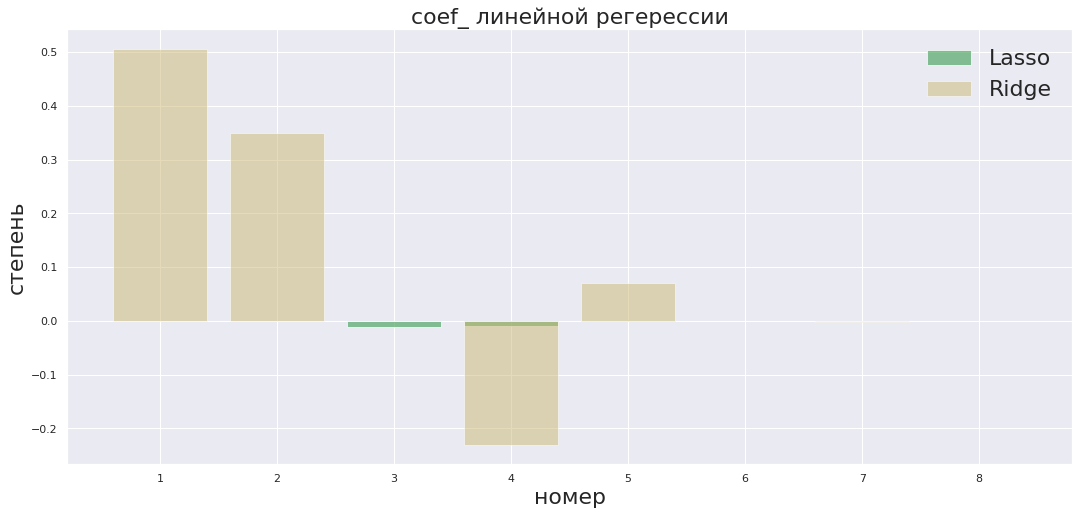

In [ ]:
degree = 8
X = generate_degrees(data.x_train, degree)
y = data.y_train.values
model_lasso = Lasso(alpha=0.8).fit(X, y)
model_ridge = Ridge(alpha=0.8).fit(X, y)
fig, subplot = plt.subplots()
subplot.bar(np.linspace(1, degree, degree), model_lasso.coef_, color='g', alpha = 0.7)
subplot.bar(np.linspace(1, degree, degree), model_ridge.coef_, color='y', alpha = 0.5)
subplot.set_title('coef_ линейной регерессии' , fontsize=22)
subplot.set_xlabel('номер' , fontsize=22)
subplot.set_ylabel('степень', fontsize=22)
subplot.legend(['Lasso', 'Ridge'], fontsize=22)
plt.show();

Коэффициенты model_lasso.coef_ сильно меньше чем **model_ridge.coef_** при увеличении степени ridge стремиться к нулю. 

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!

### Урок 8. Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [ ]:
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)

Итарации остановлены на шаге 1133
r2 0.01577924438658096
CPU times: user 1.29 s, sys: 7.79 ms, total: 1.3 s
Wall time: 1.3 s


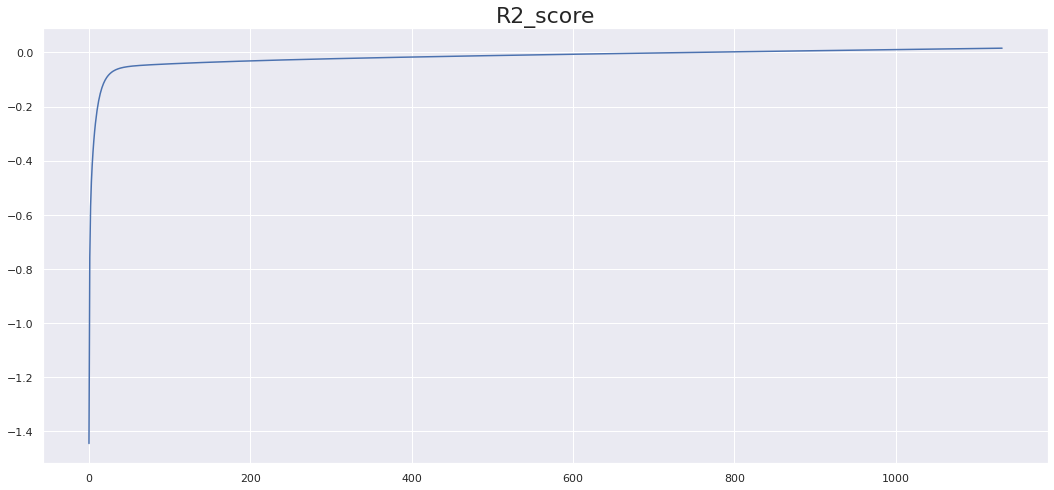

In [ ]:
# тестим затраченное время
%%time

sgd_regressor = SGDRegressor(
    learning_rate='constant',\
    eta0=0.00000001,\
    fit_intercept=True,\
    random_state=42)
w_current, epsilon = np.random.random(13), 0.0001 
# тоесть по 13 фичам. можно выбрать более коррелируемые фичи, нормализовать и искать R2 по ним. 
weight_evolution, r2 = [], []

for step in list(range(8000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1] < epsilon:
      print(f"Итарации остановлены на шаге {step}")
      print(f"r2 {r2[-1]}"); break
    r2.append(sgd_regressor.score(X_test, y_test))
    w_current = sgd_regressor.coef_.copy()
plt.title('R2_score' , fontsize=22)
plt.plot(range(step), r2);

Вы можете начать использовать градиентный спуск уже сейчас! Если вы хотите глубже понять механизмы, которые использует этот приём - добро пожаловать в урок 5, где мы поговорим о математике, которая стоит за градиентным спуском и даже реализуем градиентный спуск на языке Python.

### Урок 12. Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

In [ ]:
# восстановим реализацию функции из лекции
# добавляем параметр лямбда, и так как это задекларированное имя в Python 
# ставим постфикс согласно PEP8

def gradient(X, y, w, lambda_) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    grad = np.multiply(X, error).sum(axis=0)*(-1.0)*2.0 / n + lambda_*2.0*w
    return grad, error

def eval_w_next(X, y, eta, w_current, lambda_=0.0):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current, lambda_)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001, lambda_=0.0) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, lambda_)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

ОБУЧЕНИЕ

In [4]:
# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц.
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008, lambda_=0.01)

step 100 |w-w_next|=0.00502, grad=[-0.60295244  0.17418097]
step 200 |w-w_next|=0.00427, grad=[-0.51234917  0.14800748]
step 300 |w-w_next|=0.00363, grad=[-0.4353605   0.12576699]
step 400 |w-w_next|=0.00308, grad=[-0.36994061  0.10686848]
step 500 |w-w_next|=0.00262, grad=[-0.3143511   0.09080978]
step 600 |w-w_next|=0.00222, grad=[-0.26711481  0.07716416]
step 700 |w-w_next|=0.00189, grad=[-0.22697653  0.06556901]
step 800 |w-w_next|=0.00161, grad=[-0.19286967  0.05571621]
step 900 |w-w_next|=0.00136, grad=[-0.16388791  0.04734396]
step 1000 |w-w_next|=0.00116, grad=[-0.13926113  0.04022977]


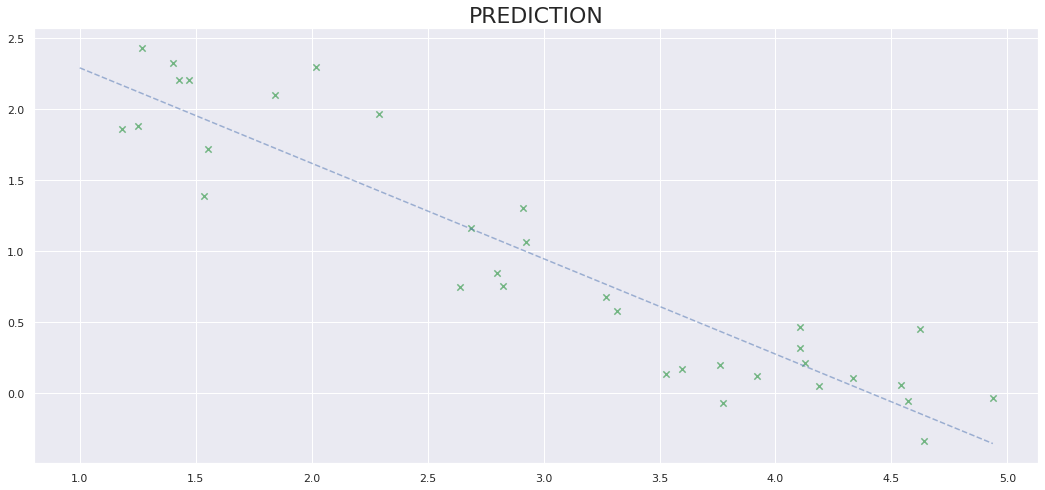

In [5]:
support = np.linspace(X.min(), X.max(), num=100)
# делаем предикт - считаем предсказания модели в каждой точке обучающей выборке в виде y=X*w
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T)
# строим график
plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(
    data['x_train'], data['y_train'], 40, 'g', 'x', alpha=0.8, label='data')
plt.title('PREDICTION' , fontsize=22)
plt.show()

В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.